<a href="https://colab.research.google.com/github/ram-elgov/Statistics-For-CS/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [29]:
import numpy as np
import pandas as pd

from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm
from seaborn import kdeplot

In [30]:
K = 10 ** 4
mu = 175
sigma = 10

norm_rv = norm(loc=mu, scale=sigma)
alpha = 0.05
sizes = [10, 20, 40, 80]

# for n in sizes:
#   print(f"n={n}")
#   samples = np.array([norm_rv.rvs(size=n) for _ in range(K)])
#   x_bar = samples.mean()
#   epsilon = norm.ppf(1 - alpha / 2) * sigma / sqrt(n)
#   ci_low, ci_high = (x_bar - epsilon, x_bar + epsilon)
#   ci_length = ci_high - ci_low
#   print(f"CI = ({ci_low:.4f}, {ci_high:.4f}")
#   print(f"CI Length = {ci_length:.4f}")
#   print(f"Real µ is in CI: {ci_low <= mu <= ci_high}")
#   print(
#       f"Probability for a new sample to be inside the CI: "
#       f"{(norm_rv.cdf(ci_high) - norm_rv.cdf(ci_low)):.4f}"
#   )
#   print()

for n in sizes:
  ci_lengths_vector = np.array([])
  ci_contains_real_expected_value = np.array([])
  probabilities_to_fall_in_ci = np.array([])

  for i in range(K):
    samples = norm_rv.rvs(size=n)
    x_bar = samples.mean()
    epsilon = norm.ppf(1 - alpha / 2) * sigma / sqrt(n)
    ci_low, ci_high = (x_bar - epsilon, x_bar + epsilon)
    ci_length = ci_high - ci_low

    ci_lengths_vector = np.append(ci_lengths_vector, ci_length)
    ci_contains_real_expected_value = np.append(ci_contains_real_expected_value, ci_low <= mu <= ci_high)
    probabilities_to_fall_in_ci = np.append(probabilities_to_fall_in_ci, norm_rv.cdf(ci_high) - norm_rv.cdf(ci_low))
  
  print(f"n={n}")
  print(f"CI length average: {ci_lengths_vector.mean():.4f}")
  print(f"Std of CI lengths: {ci_lengths_vector.std():.4f}")
  print(f"Probability of µ to fall in CI: {(np.count_nonzero(ci_contains_real_expected_value) / len(ci_contains_real_expected_value)):.4f}")
  print(f"Mean probability of random sample to fall in CI: {np.mean(probabilities_to_fall_in_ci):.4f}")
  print()


n=10
CI length average: 12.3959
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.9493
Mean probability of random sample to fall in CI: 0.4453

n=20
CI length average: 8.7652
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.9506
Mean probability of random sample to fall in CI: 0.3312

n=40
CI length average: 6.1980
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.9486
Mean probability of random sample to fall in CI: 0.2405

n=80
CI length average: 4.3826
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.9516
Mean probability of random sample to fall in CI: 0.1724



In [31]:
n = 30
alphas = [0.05, 0.1, 0.2]

for alpha in alphas:
  ci_lengths_vector = np.array([])
  ci_contains_real_expected_value = np.array([])
  probabilities_to_fall_in_ci = np.array([])

  for i in range(K):
    samples = norm_rv.rvs(size=n)
    x_bar = samples.mean()
    epsilon = norm.ppf(1 - alpha / 2) * sigma / sqrt(n)
    ci_low, ci_high = (x_bar - epsilon, x_bar + epsilon)
    ci_length = ci_high - ci_low

    ci_lengths_vector = np.append(ci_lengths_vector, ci_length)
    ci_contains_real_expected_value = np.append(ci_contains_real_expected_value, ci_low <= mu <= ci_high)
    probabilities_to_fall_in_ci = np.append(probabilities_to_fall_in_ci, norm_rv.cdf(ci_high) - norm_rv.cdf(ci_low))
  
  print(f"n={n}")
  print(f"CI length average: {ci_lengths_vector.mean():.4f}")
  print(f"Std of CI lengths: {ci_lengths_vector.std():.4f}")
  print(f"Probability of µ to fall in CI: {(np.count_nonzero(ci_contains_real_expected_value) / len(ci_contains_real_expected_value)):.4f}")
  print(f"Mean probability of random sample to fall in CI: {np.mean(probabilities_to_fall_in_ci):.4f}")
  print()

n=30
CI length average: 7.1568
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.9529
Mean probability of random sample to fall in CI: 0.2752

n=30
CI length average: 6.0062
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.8998
Mean probability of random sample to fall in CI: 0.2323

n=30
CI length average: 4.6796
Std of CI lengths: 0.0000
Probability of µ to fall in CI: 0.8062
Mean probability of random sample to fall in CI: 0.1821



## Problem 3

In [32]:
grades = np.array([113, 105, 102, 104, 117, 123, 110, 108, 93, 96, 99, 107, 112, 82, 96])

print(f"µ = {grades.mean():.4f}")
print(f"σ = {grades.std():.4f}")

µ = 104.4667
σ = 9.9858


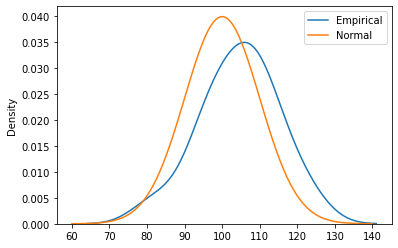

In [33]:
kdeplot(grades, label="Empirical")

mu, sigma = 100, 10
expected_iq_dist = norm(loc=mu, scale=sigma)
x = np.linspace(60, 140, 100)
y = expected_iq_dist.pdf(x)
plt.plot(x, y, label="Normal")
plt.legend()
plt.show()

In [34]:
alpha = 0.2
epsilon = norm.ppf(1 - alpha / 2) * sigma / sqrt(len(grades))
ci_low, ci_high = grades.mean() - epsilon, grades.mean() + epsilon

print((ci_low, ci_high))

(101.15771475289316, 107.77561858044018)


## Problem 4

In [44]:
# a
pd.set_option("display.precision", 4)
df12 = pd.DataFrame(pd.read_csv("Keshet12.csv"))
df13 = pd.DataFrame(pd.read_csv("Reshet13.csv"))

votes_12 = df12.sum()
votes_13 = df13.sum()
total_votes12 = sum(votes_12)
total_votes13 = sum(votes_13)
votes_proportion_dist12 = votes_12 / total_votes12
votes_proportion_dist13 = votes_13 / total_votes13
print("The empirical distribution of votes sampled by Keshet 12:")
print(votes_proportion_dist12)
print("The empirical distribution of votes sampled by Reshet 13:")
print(votes_proportion_dist13)



The empirical distribution of votes sampled by Keshet 12:
A    0.0390
B    0.0579
C    0.0402
D    0.0405
E    0.0305
F    0.0524
G    0.0301
H    0.0328
I    0.2983
J    0.0358
K    0.0428
L    0.0181
M    0.2024
N    0.0792
dtype: float64
The empirical distribution of votes sampled by Reshet 13:
A    0.0469
B    0.0466
C    0.0127
D    0.0299
E    0.0329
F    0.0330
G    0.0382
H    0.0470
I    0.2857
J    0.0293
K    0.0339
L    0.0195
M    0.2840
N    0.0603
dtype: float64


In [67]:
# b
np.set_printoptions(4)
z = norm.ppf(0.975)
sigma = 0.5
CI_L = lambda x: x - z * (sigma / (total_votes12 ** 0.5))
CI_U = lambda x: x + z * (sigma /(total_votes12 ** 0.5))
CI_L12 = votes_proportion_dist12.apply(CI_L).to_numpy()
CI_U12 = votes_proportion_dist12.apply(CI_U).to_numpy()
CI_L13 = votes_proportion_dist13.apply(CI_L).to_numpy()
CI_U13 = votes_proportion_dist13.apply(CI_U).to_numpy()
print("Keshet 12:")
for l,u in zip(CI_L12, CI_U12):
  print(f'[{l:.4f},{u:.4}]')

print("\nReshet 13:")
for l,u in zip(CI_L13, CI_U13):
  print(f'[{l:.4f},{u:.4}]')

Keshet 12:
[0.0279,0.05005]
[0.0468,0.06902]
[0.0291,0.05133]
[0.0294,0.05159]
[0.0194,0.0416]
[0.0413,0.06351]
[0.0190,0.04121]
[0.0217,0.0439]
[0.2873,0.3094]
[0.0247,0.04685]
[0.0317,0.0539]
[0.0070,0.02916]
[0.1913,0.2135]
[0.0681,0.09029]

Reshet 13:
[0.0358,0.05797]
[0.0355,0.05765]
[0.0016,0.02377]
[0.0188,0.04103]
[0.0218,0.04402]
[0.0219,0.04412]
[0.0272,0.04934]
[0.0359,0.05808]
[0.2747,0.2968]
[0.0182,0.04039]
[0.0228,0.04497]
[0.0084,0.03059]
[0.2729,0.2951]
[0.0492,0.0714]


In [68]:
# c
sorted_votes_proportion_12 = pd.Series(pd.Series.sort_values(votes_proportion_dist12))
y_vec12 = sorted_votes_proportion_12.to_numpy()
sorted_votes_proportion_13 = pd.Series(pd.Series.sort_values(votes_proportion_dist13))
y_vec13 = sorted_votes_proportion_13.to_numpy()

x_vec = np.linspace(1,14,14, dtype=int) 
epsilon = 0.2
print()
CI_L12 = pd.Series(pd.Series.sort_values(votes_proportion_dist12.apply(CI_L)))
CI_U12 = pd.Series(pd.Series.sort_values(votes_proportion_dist12.apply(CI_U)))
CI_L13 = pd.Series(pd.Series.sort_values(votes_proportion_dist13.apply(CI_L)))
CI_U13 = pd.Series(pd.Series.sort_values(votes_proportion_dist13.apply(CI_U).to_numpy()))

AttributeError: ignored

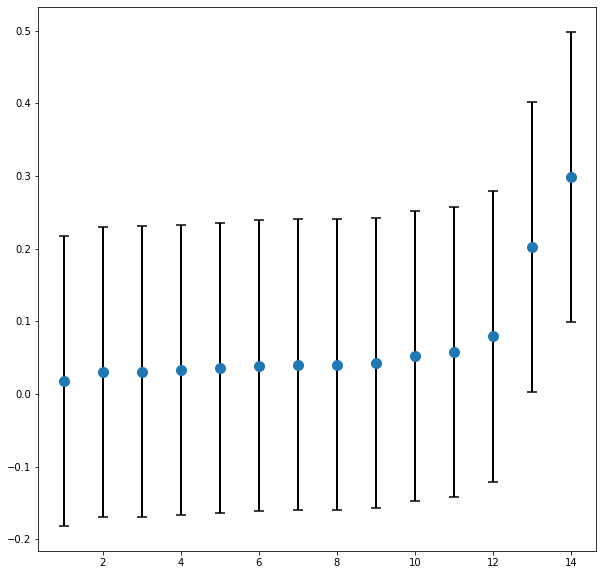

In [66]:
# candle plot for Keshet 12:
plt.figure(figsize=(10,10)) # sets size of the plot
plt.scatter(x=x_vec ,y=y_vec12,s=100,zorder=10) # scatter plot (dots)

plt.scatter(x=x_vec, y=y_vec12-epsilon, color='black', marker="_", s=100) # scatter plot ("_" mark)
plt.scatter(x=x_vec, y=y_vec12+epsilon, color='black', marker="_", s=100) # scatter plot ("_" line)
plt.vlines(x=x_vec, ymin=y_vec12-epsilon, ymax=y_vec12+epsilon, colors='black', ls='-', lw=2) # scatter plot (line between ymin to y max)

plt.show()

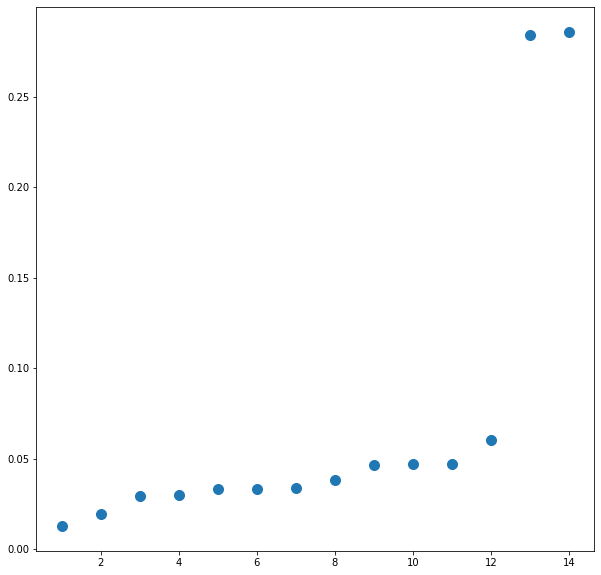

In [64]:
# candle plot for Keshet 13:
x_vec = np.linspace(1,14,14, dtype=int) 
epsilon = 0.2

plt.figure(figsize=(10,10)) # sets size of the plot
plt.scatter(x=x_vec ,y=y_vec13,s=100,zorder=10) # scatter plot (dots)

# plt.scatter(x=x_vec, y=y_vec-epsilon, color='black', marker="_", s=100) # scatter plot ("_" mark)
# plt.scatter(x=x_vec, y=y_vec+epsilon, color='black', marker="_", s=100) # scatter plot ("_" line)
# plt.vlines(x=x_vec, ymin=y_vec-epsilon, ymax=y_vec+epsilon, colors='black', ls='-', lw=2) # scatter plot (line between ymin to y max)

plt.show()

In [38]:
# d
votes_12 = df12.sum()
votes_13 = df13.sum()
total_votes12 = votes_12["I"] + votes_12["M"]
total_votes13 = votes_13["I"] + votes_13["M"]
print("Keshet 12:")
p_est12 = votes_12["I"] / total_votes12
print(f'p(I) = {p_est12:.4f}')
print(f'p(M) = {votes_12["M"] / total_votes12:.4f}')
print("\nReshet 13:")
p_est13 = votes_13["I"] / total_votes13
print(f'p(I) = {p_est13:.4f}')
print(f'p(M) = {votes_13["M"] / total_votes13:.4f}')


Keshet 12:
p(I) = 0.5959
p(M) = 0.4041

Reshet 13:
p(I) = 0.5015
p(M) = 0.4985


In [39]:
CI_L12_I_M = p_est12 - z * (sigma / (total_votes12 ** 0.5))
CI_U12_I_M = p_est12 + z * (sigma / (total_votes12 ** 0.5))
print(f"[{CI_L12_I_M:.4f},{CI_U12_I_M:.4f}]")

[0.5802,0.6115]


In [40]:
CI_L13_I_M = p_est13 - z * (sigma / (total_votes13 ** 0.5))
CI_U13_I_M = p_est13 + z * (sigma / (total_votes13 ** 0.5))
print(f"[{CI_L13_I_M:.4f},{CI_U13_I_M:.4f}]")

[0.4881,0.5149]


In [41]:
z = norm.ppf(0.995)
print(z)

2.5758293035489004


In [42]:
# e
CI_L12_I_M = p_est12 - z * (sigma / (total_votes12 ** 0.5))
CI_U12_I_M = p_est12 + z * (sigma / (total_votes12 ** 0.5))
print(f"[{2 * CI_L12_I_M - 1:.4f},{2 * CI_U12_I_M - 1:.4f}]")

[0.1505,0.2329]


In [43]:
CI_L13_I_M = p_est13 - z * (sigma / (total_votes13 ** 0.5))
CI_U13_I_M = p_est13 + z * (sigma / (total_votes13 ** 0.5))
print(f"[{2 * CI_L13_I_M - 1:.4f},{2 * CI_U13_I_M - 1:.4f}]")

[-0.0322,0.0382]
